In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['bmh'])
from pandas import ExcelWriter
import os
import openpyxl
import seaborn as sns

In [2]:
data_path = '/Users/rosa/Desktop/ALLWork/Madison/Project/Soil-nn/Code/pythoncode/Main Data Files/response_sklearn'

In [3]:
path_list = []

for root, dirs, files in os.walk(data_path, topdown=False):
    for path in dirs:
        path_list.append(path)
        
wb = openpyxl.load_workbook(data_path+'/'+path+'/classification.xlsx')
sheet_list = wb.sheetnames

results_dic = dict.fromkeys(sheet_list)

for sheet_name in results_dic.keys():
    temp_df = pd.DataFrame(columns=path_list)
    for folder in path_list:
        data_temp = pd.read_excel(data_path+'/'+folder+'/classification.xlsx', sheet_name=sheet_name)
        temp_df[folder] = data_temp.iloc[4][1:].values

    results_dic[sheet_name] = temp_df

## boxplot for only one level

In [125]:
'''new_df_order = pd.DataFrame(columns=['Data', 'Response'])
for col in results_dic['Order']:
    temp_df = pd.DataFrame()
    temp_df['Data'] = results_dic['Order'][col].values
    temp_df['Response'] = col
    new_df_order = pd.concat([new_df_order, temp_df])

plt.figure(figsize=(12,4), dpi=300)
sns.boxplot(data = new_df_order, x='Response', y='Data')
plt.xticks(rotation = 90)
plt.ylabel('f-score')
plt.xlabel('Response Type')'''

"new_df_order = pd.DataFrame(columns=['Data', 'Response'])\nfor col in results_dic['Order']:\n    temp_df = pd.DataFrame()\n    temp_df['Data'] = results_dic['Order'][col].values\n    temp_df['Response'] = col\n    new_df_order = pd.concat([new_df_order, temp_df])\n\nplt.figure(figsize=(12,4), dpi=300)\nsns.boxplot(data = new_df_order, x='Response', y='Data')\nplt.xticks(rotation = 90)\nplt.ylabel('f-score')\nplt.xlabel('Response Type')"

## Boxplot for all

In [4]:
main_df = pd.DataFrame(columns=['Data', 'Response'])
for key in results_dic.keys():
    for col in results_dic[key]:
        temp_df = pd.DataFrame()
        temp_df['Data'] = results_dic[key][col].values
        temp_df['Response'] = col
        temp_df['Level'] = key
        main_df = pd.concat([main_df, temp_df])                       

Text(0.5, 0, 'Response Type')

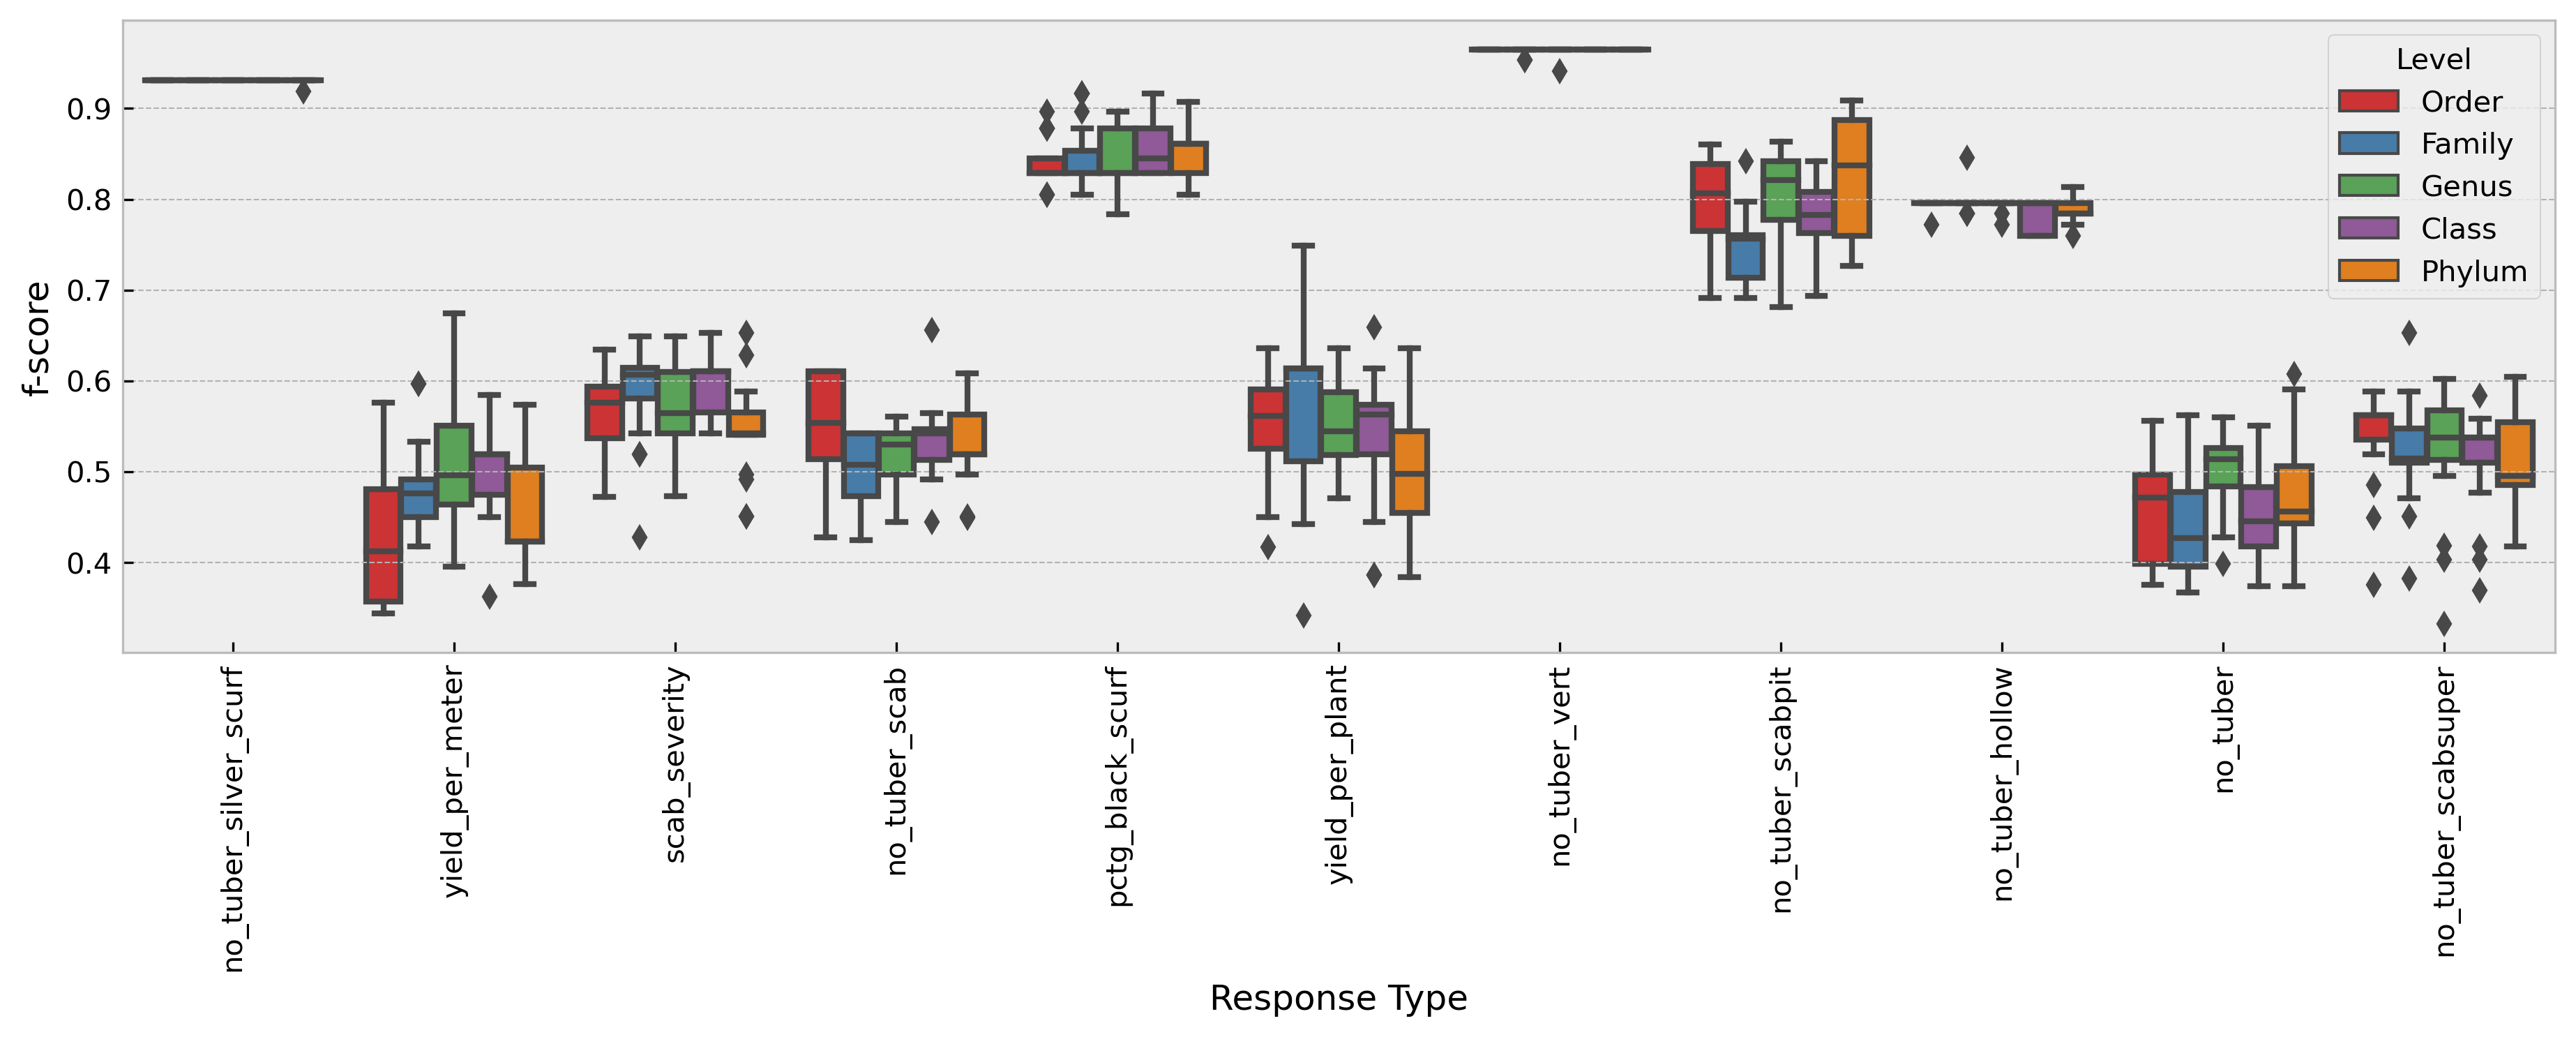

In [5]:
plt.figure(figsize=(15,4), dpi=300)
sns.boxplot(data = main_df, x='Response', y='Data', hue='Level', palette='Set1')
plt.xticks(rotation = 90)
plt.ylabel('f-score')
plt.xlabel('Response Type')